In [565]:
from sklearn.linear_model import SGDRegressor  # Импортируем регрессор SGD
from sklearn.model_selection import GridSearchCV  # Импортируем класс для поиска по сетке
from sklearn.model_selection import train_test_split  # Импортируем функцию для разделения данных на обучающую и тестовую выборки
from sklearn.metrics import mean_squared_error  # Импортируем функцию для вычисления среднеквадратичной ошибки
import seaborn as sns  # Импортируем библиотеку Seaborn для визуализации данных
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными в формате DataFrame
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
import matplotlib.pyplot as plt # библиотека визуализации

In [566]:
np.random.seed(42)

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [567]:
df = pd.read_csv('data/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [568]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [569]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
missing_values_count = df.isnull().sum()
missing_values_count

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

ВЫВОД: Пропусков нет

**Построем в дополнение диаграмму рассеяния для проверки предположения о линейности между каждой независимой переменной (ТВ, Радио, Газета) и зависимой переменной (Продажи)**

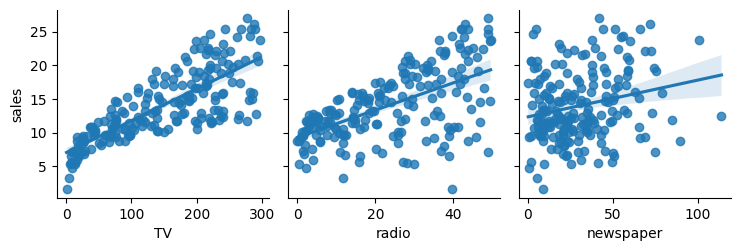

In [570]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", kind="reg")

**Также построим гистограммы для проверки распределения.**

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

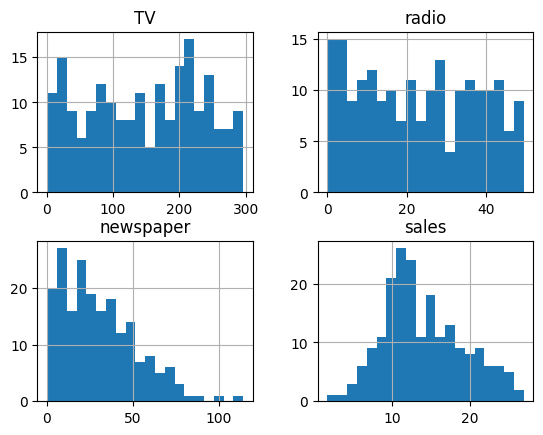

In [571]:
df.hist(bins=20)

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [572]:
X = df.drop('sales', axis=1).values  # Преобразуем в массив NumPy
y = df['sales'].values  # Преобразуем целевую переменную в массив NumPy

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [573]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [574]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [575]:
# Реализация алгоритма координатного спуска
num_iters = 1000  # количество итераций
m, n = X.shape  # количество строк и столбцов в матрице X
w = np.zeros((n, 1))  # создаем вектор w размера nx1, состоящий из нулей
loss_history = []  # история значений функции потерь
mse_history = [] # история среднеквадратичной ошибки

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])  # Убираем влияние k-ого фактора
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = np.sum((X @ w) - y) ** 2 / len(y)
        mse = np.mean((X @ w - y) ** 2)
        loss_history.append(cost)
        mse_history.append(mse)

# Выводим параметры и значение функции потерь после всех итераций
print("Параметры модели:", w)
print("Последнее значение функции потерь:", loss_history[-1])
print("Среднеквадратичная ошибка:", mse_history[-1])

Параметры модели: [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]
Последнее значение функции потерь: 3.788110066871299e-29
Среднеквадратичная ошибка: 2.784126314510936


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [576]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [577]:
X = df.drop('sales', axis=1).values  # Преобразуем в массив NumPy
y = df['sales'].values  # Преобразуем целевую переменную в массив NumPy

# Масштабирование (стандартизация) данных
mean = X.mean(axis=0)  # Вычисляем среднее по каждому столбцу axis=0. Если axis не указан, по умолчанию используется значение None, что означает, что функция будет применяться ко всему массиву, и результат будет возвращен как скаляр.
std = X.std(axis=0)    # Вычисляем стандартное отклонение по каждому столбцу

# Стандартизация: вычитаем среднее и делим на стандартное отклонение
X_scaled = (X - mean) / std

# Проверка результатов
print("Исходные данные:\n", X)
print("Отмасштабированные данные:\n", X_scaled)

Исходные данные:
 [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  3

**Добавим единичный столбец**

In [578]:
X = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [579]:
def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE) между реальными и предсказанными значениями.

    :param y_true: Реальные значения (numpy array)
    :param y_pred: Предсказанные значения (numpy array)
    :return: Значение MSE
    """
    # Вычисляем MSE
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [580]:
# Наивный прогноз: предсказание на основе среднего значения
mean_sales = np.mean(y)  # Вычисляем среднее значение продаж
y_pred_naive = np.full_like(y, mean_sales)  # Создаем массив предсказанных значений

# Рассчитываем среднеквадратичную ошибку для наивного прогноза
mse_naive = mse_error(y, y_pred_naive)

# Выводим результаты
print("Среднее значение продаж:", mean_sales)
print("Среднеквадратичная ошибка (MSE) для наивного прогноза:", mse_naive)

Среднее значение продаж: 14.0225
Среднеквадратичная ошибка (MSE) для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [581]:
def lin_pred(X, w):
    """
    Функция для получения вектора прогнозов на основе матрицы предикторов и вектора весов.

    :param X: Матрица предикторов (numpy array)
    :param w: Вектор весов (numpy array)
    :return: Вектор прогнозов (numpy array)
    """
    # Проверка на совместимость размеров
    if X.shape[1] != w.shape[0]:
        raise ValueError("Количество столбцов в X должно совпадать с количеством элементов в w.")
    
    # Вычисляем прогнозы
    predictions = X @ w  # Линейное предсказание
    return predictions

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [582]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Выполняет один шаг стохастического градиентного спуска.

    :param X: Матрица предикторов (numpy array)
    :param y: Вектор реальных значений (numpy array)
    :param w: Вектор весов (numpy array)
    :param train_ind: Индекс объекта обучающей выборки (строки матрицы X)
    :param eta: Шаг градиентного спуска
    :return: Обновленный вектор весов (numpy array)
    """

    # Предсказанное значение для объекта обучающей выборки
    y_pred = X[train_ind]@w

    # Вычисляем направление изменения весов
    gradient = (2 * X[train_ind] * (y_pred - y[train_ind])) / y[train_ind].size

    # Обновляем веса
    w_updated = w - eta * gradient

    return w_updated

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [583]:
def stochastic_gradient_descent(X, y, initial_w, eta, max_iter, tol):
    """
    Реализует стохастический градиентный спуск.

    :param X: Матрица признаков (numpy array)
    :param y: Целевая переменная (numpy array)
    :param initial_w: Изначальная точка (веса модели) (numpy array)
    :param eta: Темп обучения
    :param max_iter: Максимальное число итераций
    :param tol: Евклидово расстояние для прекращения работы
    :return: Вектор весов и список ошибок
    """
    
    # Инициализация
    w = initial_w.copy()  # Копируем начальные веса
    error_list = []  # Список для хранения ошибок
    distance = np.inf  # Начальное значение расстояния между векторами весов
    iter_count = 0  # Счетчик итераций

    while distance > tol and iter_count < max_iter:
        # Генерируем случайный индекс для стохастического градиентного спуска
        train_ind = np.random.randint(len(y))
        
        # Записываем текущую ошибку в список
        y_pred = lin_pred(X, w)  # Предсказание с текущими весами
        current_error = mse_error(y, y_pred) # Среднеквадратичная ошибка
        error_list.append(current_error)

        # Обновляем веса с помощью стохастического градиентного спуска
        new_w = stoch_grad_step(X, y, w, train_ind, eta)

        # Вычисляем евклидово расстояние между новыми и старыми весами
        distance = np.linalg.norm(new_w - w)

        # Обновляем вектор весов на новые значения
        w = new_w
        
        # Увеличиваем счетчик итераций
        iter_count += 1

    return w, error_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Лучший темп обучения (eta): 0.0010909090909090903
Минимальная ошибка: 2.791340649525978
Финальные веса: [14.07418625  3.97287169  2.78265511 -0.06267778]


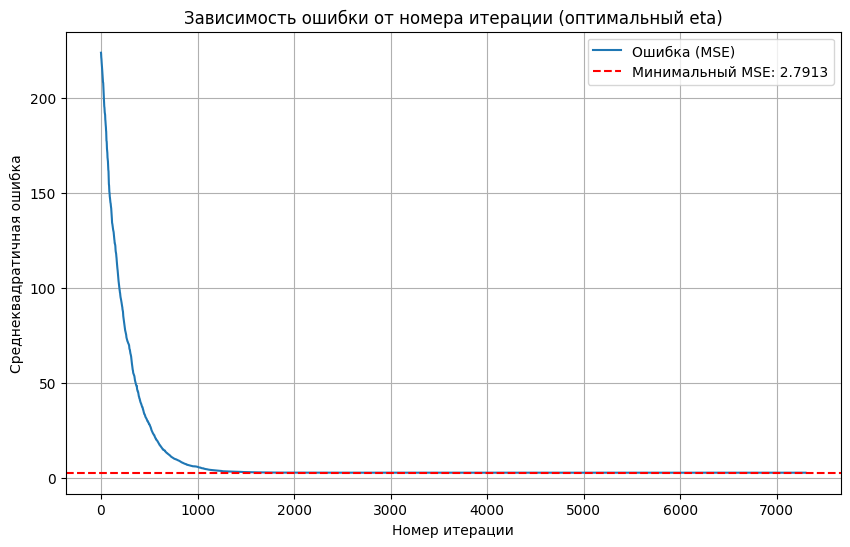

In [588]:
# Параметры для стохастического градиентного спуска
initial_w = np.zeros(X.shape[1])  # Изначальные веса нулями
max_iter = int(1e5)   # Максимальное число итераций (10^5)
tol = 1e-6            # Евклидово расстояние для прекращения работы

# Поиск минимальной ошибки при изменении eta от 0.01 до 0.001
best_eta = None
min_error = np.inf
best_weights = None
error_history = []
all_errors = {}  # Словарь для хранения ошибок для каждого значения eta

# Изменяем eta от 0.01 до 0.001
for eta in np.linspace(0.01, 0.001, num=100):
    #np.random.seed(42)
    final_weights, errors = stochastic_gradient_descent(X, y, initial_w, eta, max_iter, tol)
    
    # Сохраняем историю ошибок для графика
    error_history.append(errors[-1])
    
    # Сохраняем все ошибки для текущего значения eta
    all_errors[eta] = errors
    
    # Проверяем наименьшую ошибку
    if errors[-1] < min_error:
        min_error = errors[-1]
        best_eta = eta
        best_weights = final_weights

# Выводим результаты
print("Лучший темп обучения (eta):", best_eta)
print("Минимальная ошибка:", min_error)
print("Финальные веса:", best_weights)

# Построение графика зависимости ошибки от номера итерации для наилучшего eta
plt.figure(figsize=(10, 6))
plt.plot(all_errors[best_eta], label='Ошибка (MSE)')

# Добавляем линию для минимального MSE
min_mse = min_error  # Находим минимальное значение MSE
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Минимальный MSE: {min_mse:.4f}')

plt.title('Зависимость ошибки от номера итерации (оптимальный eta)')
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка')
plt.grid()
plt.legend()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [590]:
print("Финальные веса при оптимальном eta:", best_weights)

Финальные веса при оптимальном eta: [14.07418625  3.97287169  2.78265511 -0.06267778]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [589]:
print("Минимальная ошибка при оптимальном eta:", min_error)

Минимальная ошибка при оптимальном eta: 2.791340649525978


ВЫВОД:
1) Эффективность моделей: Координатный спуск продемонстрировал наилучшие результаты по сравнению с наивным прогнозом и стохастическим градиентным спуском по критерию MSE.
2) Сравнение методов: Хотя стохастический градиентный спуск показал немного более высокую ошибку по сравнению с координатным спуском, он все же обеспечивает хорошую производительность и может быть предпочтительным в сценариях с большими объемами данных из-за своей скорости.
3) Применимость моделей: Выбор метода зависит от конкретной задачи и доступных ресурсов: координатный спуск может быть более точным, но более медленным, тогда как стохастический градиентный спуск может быть быстрее при достаточной точности.